In [1]:
import sys, torch
rootdir = '../../..'
sys.path.append(rootdir)
from modules.proposal.box_association import match_locations_to_gt
from modules.proposal.box_functions import gen_grid_coord
from modules.plot.viz_association import viz_gt_and_assiciated_bbox, viz_pos_and_neg_locations, viz_box_associations
from modules.proposal.box_functions import change_box_repr_corner, change_box_repr_center
from modules.dataset_utils.bdd_dataset_utils.constants import _NEW_OBJ_LABELS_

In [2]:
num_objects = 8
num_bbox = num_objects

# Generate dummy classes
num_classes = len(_NEW_OBJ_LABELS_)
gt_class = torch.randint(num_classes, (num_objects,)).to(torch.float32)

# Generate dummy boxes
img_h, img_w = (224, 221)
# gt_boxes = torch.rand(num_bbox, 4)
# gt_boxes[:, [0,2]] *= img_w
# gt_boxes[:, [1,3]] *= img_h
# gt_boxes = change_box_repr_corner(gt_boxes)
x1_ = torch.rand((num_bbox), dtype=torch.float32)
y1_ = torch.rand((num_bbox), dtype=torch.float32)
x2_ = torch.rand((num_bbox), dtype=torch.float32)
y2_ = torch.rand((num_bbox), dtype=torch.float32)
x1 = img_w * torch.where(x1_ <  x2_, x1_, x2_)
x2 = img_w * torch.where(x1_ <= x2_, x2_, x1_)
y1 = img_h * torch.where(y1_ <  y2_, y1_, y2_)
y2 = img_h * torch.where(y1_ <= y2_, y2_, y1_)
gt_boxes = torch.stack((x1, y1, x2, y2), dim=-1)

# generate center locations
feat_h, feat_w = ( img_h // 5, img_w // 5) 
stride_h = img_h / feat_h
stride_w = img_h / feat_w
grid_coords = gen_grid_coord(feat_w, feat_h, stride_w, stride_h, device ='cpu')

# associations
matched_gt = match_locations_to_gt(
    centers = grid_coords,
    gt_boxes = gt_boxes,
    gt_class = gt_class,
    device = 'cpu',
    match_criteria = 'closest_box')

matched_bbox = matched_gt['matched_boxes']
matched_cls = matched_gt['matched_class']
matched_obj_id = matched_gt['matched_obj_ids']

### Validate if the associated boxes are consistent with the gt box

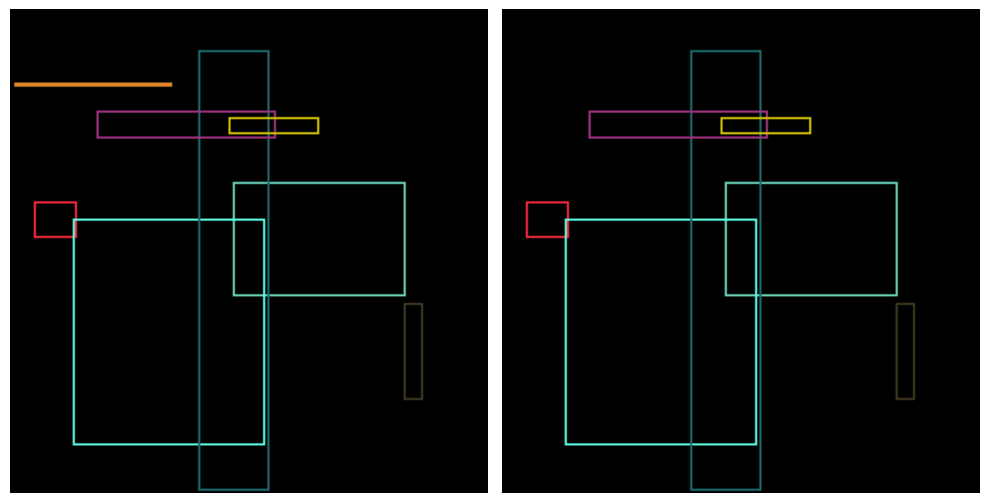

In [3]:
viz_gt_and_assiciated_bbox(
    matched_bbox.cpu().numpy(), 
    matched_obj_id.cpu().numpy(), 
    gt_boxes.cpu().numpy(), 
    img_h, img_w, 
    figsize=(10,8))

### Validate if the locations that lie within the box are positive and the rest are negative

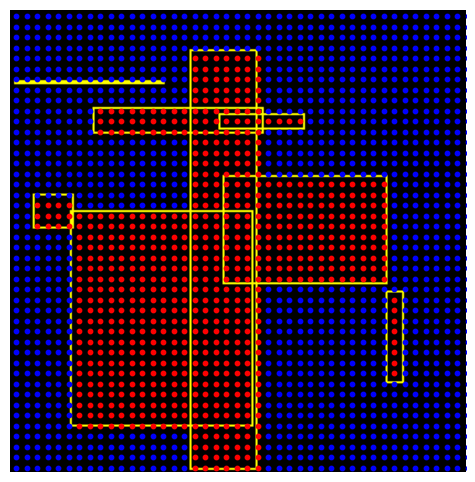

In [4]:
viz_pos_and_neg_locations(
    matched_obj_id.cpu().numpy(), 
    grid_coords.cpu().numpy(), 
    gt_boxes.cpu().numpy(),
    img_h, img_w, 
    figsize=(6,6))

### Validate if the locations are associated correctly. If a point is within multiple boxes, then the point is associated to that box which has minimum area

d:\obj_det_bdd_dataset\version_combined_final\tests\bdd\proposal\../../..\modules\plot\viz_association.py:94: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(loc_coord_box_i[:,0], loc_coord_box_i[:,1], c=color_plt, marker='o', s=6, alpha=1.0)


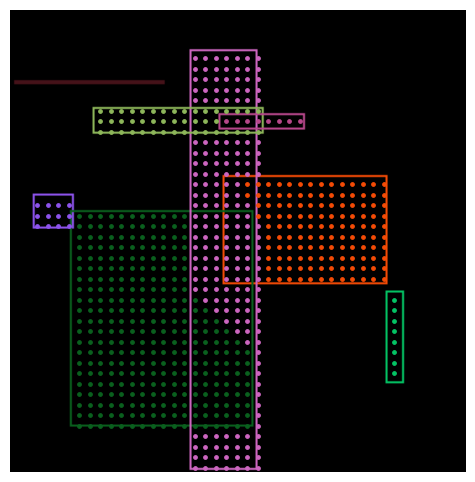

In [5]:
viz_box_associations(
    grid_coords.cpu().numpy(), 
    matched_obj_id.cpu().numpy(), 
    gt_boxes.cpu().numpy(), 
    img_h, img_w, 
    figsize=(6,6))